In [1]:
from post_processing import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "/Users/arash/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Uni_semester/Master_Thesis/EIT_Thigh_Force_Measurement/Final_Measurements/P06/EIT_P06_raw_data_12012025202214.txt"
output_path = "/Users/arash/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Uni_semester/Master_Thesis/EIT_Thigh_Force_Measurement/Final_Measurements/P06/iso_raw_data.csv"

In [3]:

iso_raw_DF = generate_DF(file_path=filename, output_path=output_path)


Cleaned data saved to /Users/arash/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Uni_semester/Master_Thesis/EIT_Thigh_Force_Measurement/Final_Measurements/P06/iso_raw_data.csv


## Plot the Torque , Speed, Angle from isoforce DF

Applying low-pass filter to torque and angle data.


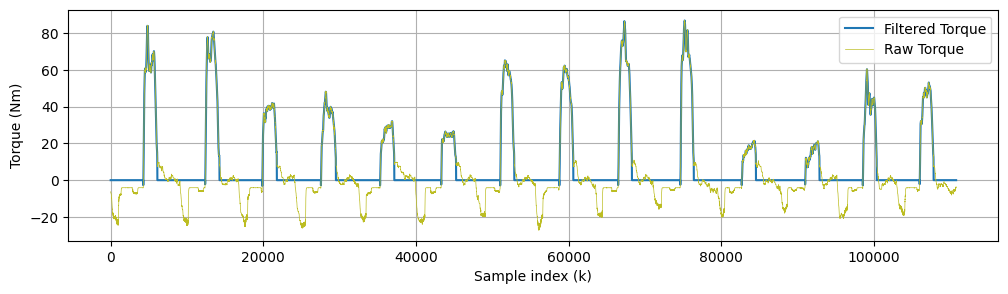

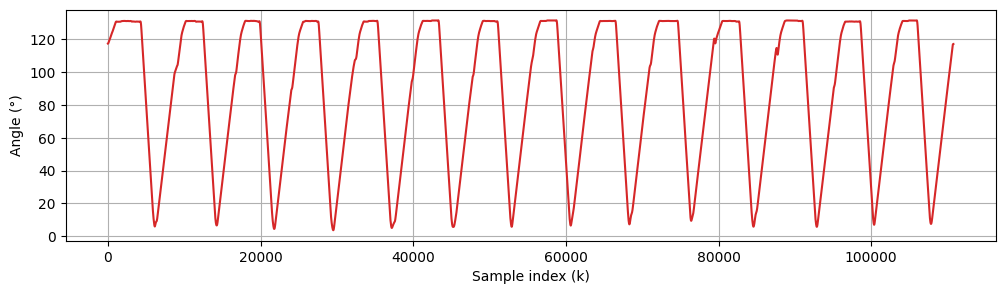

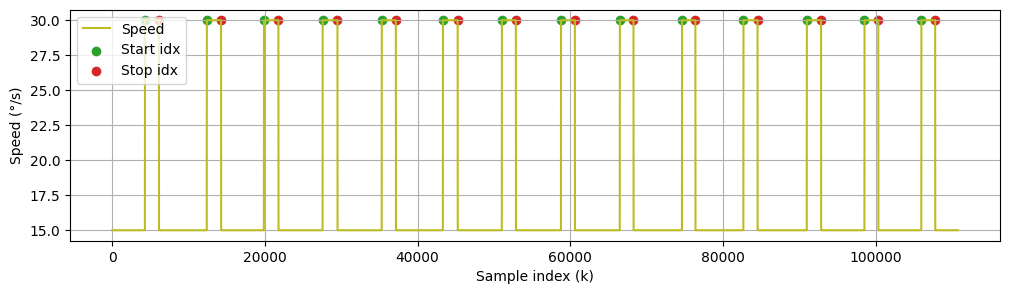

In [4]:
import pandas as pd
#iso_raw_DF = r"D:\EIT\EIT_Thigh_Force_Measurement\GUI_Data_Acquisition\measurements\Judi_t_20250207_084859\iso_raw_data.csv"
#iso_raw_DF = pd.read_csv(iso_raw_DF)
isoforce_iso = IsoForceRAW(iso_raw_DF, LP_filter_enabled=True, Leg='right')
isoforce_iso.plot_torque()
isoforce_iso.plot_angle()
isoforce_iso.plot_speed()

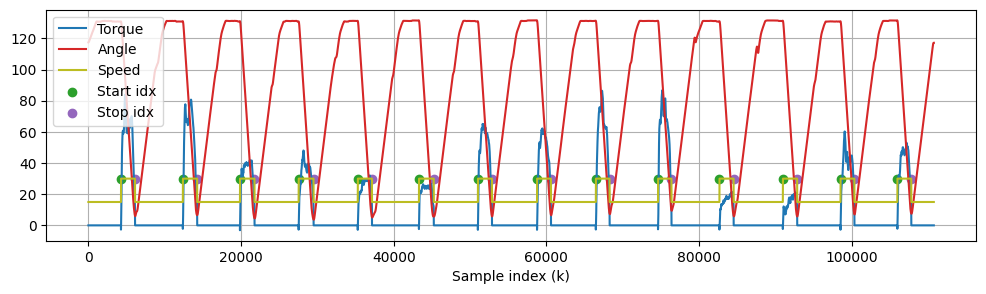

In [5]:
isoforce_iso.plot_data()


## Plot segmented Torque and angle from isoforce DF

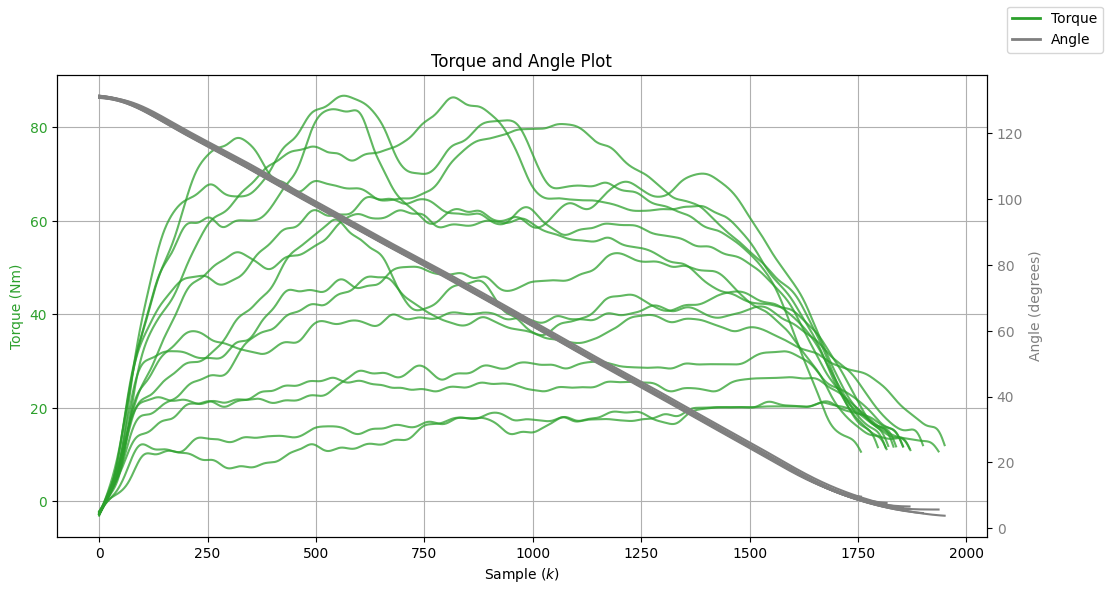

In [6]:
from matplotlib.lines import Line2D
fig, ax1 = plt.subplots(figsize=(12,6)) 

# Plot Torque on the primary y-axis
for idx in range(len(isoforce_iso.torque_segments.keys())):
    ax1.plot(isoforce_iso.torque_segments[f"T_seg_{idx}"], "C2", alpha=0.75)

ax1.set_xlabel("Sample ($k$)")
ax1.set_ylabel("Torque (Nm)", color="C2")
ax1.tick_params(axis="y", labelcolor="C2")
ax1.grid()

# Create a second y-axis for Angle
ax2 = ax1.twinx()  
for idx in range(len(isoforce_iso.angle_segments.keys())):
    ax2.plot(isoforce_iso.angle_segments[f"A_seg_{idx}"], "C7")

ax2.set_ylabel("Angle (degrees)", color="C7")
ax2.tick_params(axis="y", labelcolor="C7")

custom_lines = [
    Line2D([0], [0], color="C2", lw=2, label="Torque"),
    Line2D([0], [0], color="C7", lw=2, label="Angle")
]
fig.legend(handles=custom_lines, loc="upper right")


plt.title("Torque and Angle Plot")
plt.show()


# Isoforce Data Acquisition from NI Chip

The NI chip is equipped with three channels: P, T, and S. Each channel is associated with specific measurement parameters, including a factor and offset, as detailed below:

- **Channel 1 (P):** Angle  
  - Factor: 54  
  - Offset: 12  

- **Channel 2 (T):** Torque  
  - Factor: 150  
  - Offset: 25  

- **Channel 3 (S):** Speed  
  - Factor: 108  
  - Offset: -3  


In [7]:
import os
from post_processing import *
#base_path_NI = r"D:\EIT\EIT_Thigh_Force_Measurement\GUI_Data_Acquisition\measurements\Participant_test1"
base_path_NI = "/Users/arash/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Uni_semester/Master_Thesis/EIT_Thigh_Force_Measurement/Final_Measurements/P06"
src_path_NI = os.path.join(base_path_NI, "iso_raw")

## the distace of peak detection was decreased to 400 to extract all torque segements

In [37]:
isoforce_py = IsoForcePy(src_path_NI, Leg="right", LP_filter_enabled=True, over_UTC=True, scale_0_1=True, distance=400)


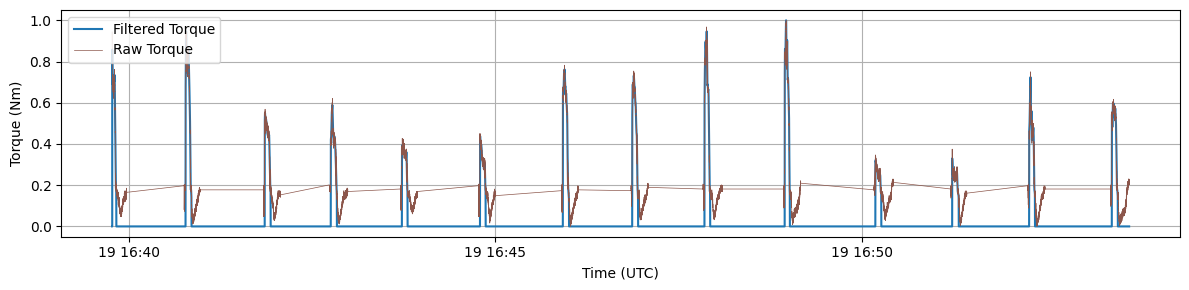

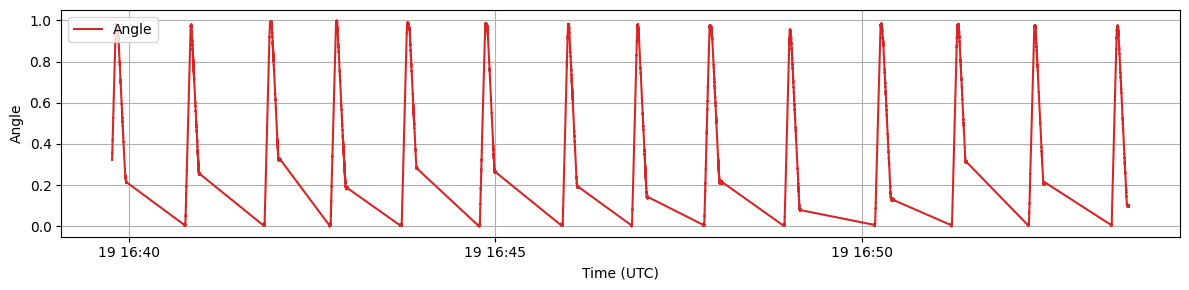

In [38]:
isoforce_py.plot_torque()
isoforce_py.plot_angle()
isoforce_py.plot_speed()


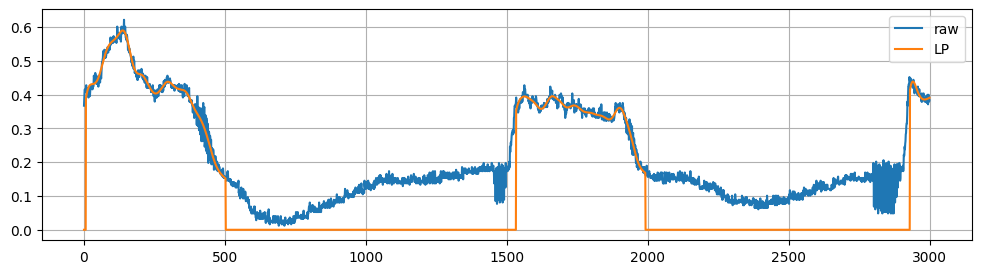

In [39]:
plt.figure(figsize=(12, 3))
plt.plot((isoforce_py.torque_raw[4000:7000]), label="raw")
plt.plot((isoforce_py.torque[4000:7000]), label="LP")
plt.legend()
plt.grid()

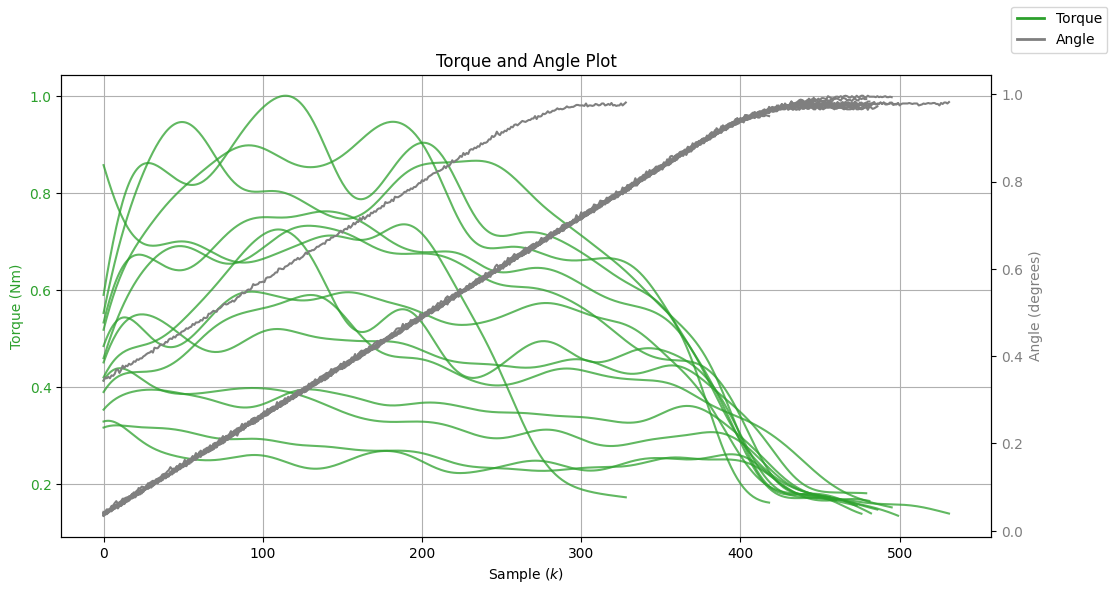

In [40]:
from matplotlib.lines import Line2D
fig, ax1 = plt.subplots(figsize=(12,6)) 

# Plot Torque on the primary y-axis
for idx in range(len(isoforce_py.torque_segments.keys())):
    ax1.plot(isoforce_py.torque_segments[f"T_seg_{idx}"], "C2", alpha=0.75)

ax1.set_xlabel("Sample ($k$)")
ax1.set_ylabel("Torque (Nm)", color="C2")
ax1.tick_params(axis="y", labelcolor="C2")
ax1.grid()

# Create a second y-axis for Angle
ax2 = ax1.twinx()  
for idx in range(len(isoforce_py.angle_segments.keys())):
    ax2.plot(isoforce_py.angle_segments[f"A_seg_{idx}"], "C7")

ax2.set_ylabel("Angle (degrees)", color="C7")
ax2.tick_params(axis="y", labelcolor="C7")

custom_lines = [
    Line2D([0], [0], color="C2", lw=2, label="Torque"),
    Line2D([0], [0], color="C7", lw=2, label="Angle")
]
fig.legend(handles=custom_lines, loc="upper right")


plt.title("Torque and Angle Plot")
plt.show()


## Synchronization between `IsoForceRaw` and `IsoForcePy`

In [41]:
#isoforce_iso.torque_segments.pop(next(iter(isoforce_iso.torque_segments)))
len(isoforce_iso.torque_segments.keys()), len(isoforce_py.torque_segments.keys())



(14, 14)

In [42]:
from scipy.signal import resample


def resample_signals(iso_iso, iso_py, target_length=None):
    iso_iso = np.asarray(iso_iso)
    iso_py = np.asarray(iso_py)
    if target_length:
        print(f"Resample both signals to a length of {target_length} samples.")
        iso_py = resample(iso_py, num=target_length)
        iso_iso = resample(iso_iso, num=target_length)
        return iso_iso, iso_py
    else:
        target_length = max(len(iso_iso), len(iso_py))
        print(f"Resample both signals to a length of {target_length} samples.")
        if len(iso_iso) > len(iso_py):
            iso_py = resample(iso_py, num=target_length)
        elif len(iso_py) > len(iso_iso):
            iso_iso = resample(iso_iso, num=target_length)
        return iso_iso, iso_py


def detect_shift(signal1, signal2):
    N = max(len(signal1), len(signal2))
    corr = np.correlate(signal1, signal2, mode="full")
    lags = np.arange(-N + 1, N)

    max_corr_idx = np.argmax(corr)
    discrete_time_shift = lags[max_corr_idx]
    print(f"Discrete time shift of {discrete_time_shift}.")
    return discrete_time_shift

Resample both signals to a length of 1839 samples.
Discrete time shift of 143.


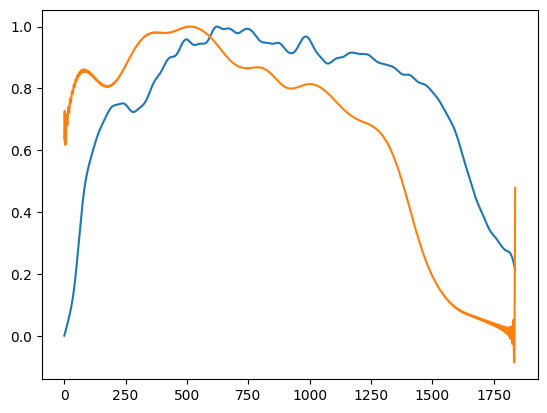

In [43]:
iso_seg_1 = scale_to_range(isoforce_iso.torque_segments[f"T_seg_{6}"])
py_seg_1 = scale_to_range(isoforce_py.torque_segments[f"T_seg_{6}"])
iso_seg_corr, py_seg_corr = resample_signals(iso_seg_1, py_seg_1)

plt.plot(iso_seg_corr, label="iso")
plt.plot(py_seg_corr, label="py")

shift = detect_shift(iso_seg_corr, py_seg_corr)

Resample both signals to a length of 1833 samples.
Discrete time shift of 166.
Resample both signals to a length of 1500 samples.


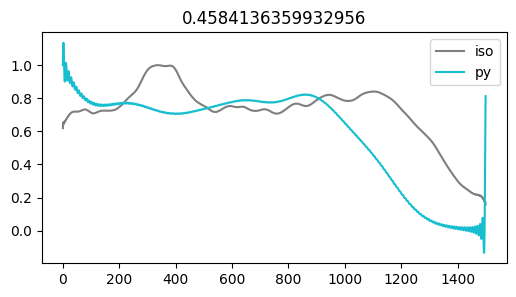

Resample both signals to a length of 1870 samples.
Discrete time shift of 120.
Resample both signals to a length of 1500 samples.


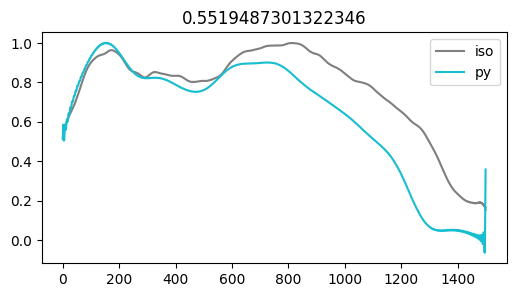

Resample both signals to a length of 1901 samples.
Discrete time shift of 124.
Resample both signals to a length of 1500 samples.


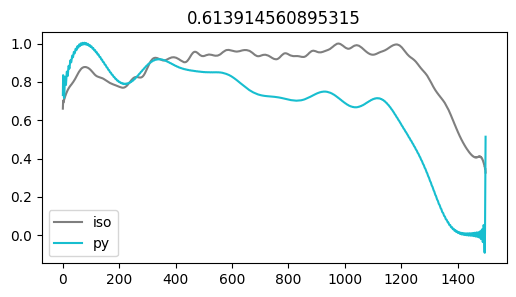

Resample both signals to a length of 1951 samples.
Discrete time shift of 155.
Resample both signals to a length of 1500 samples.


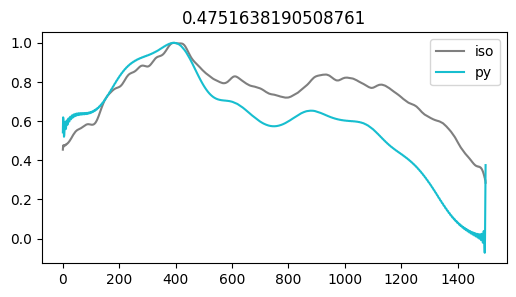

Resample both signals to a length of 1855 samples.
Discrete time shift of 127.
Resample both signals to a length of 1500 samples.


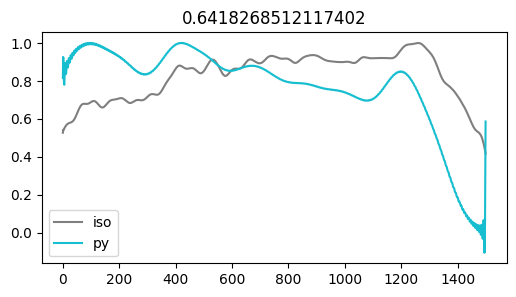

Resample both signals to a length of 1937 samples.
Discrete time shift of 76.
Resample both signals to a length of 1500 samples.


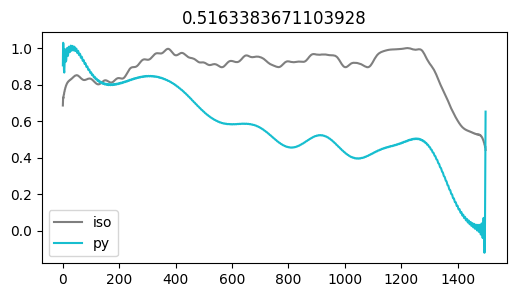

Resample both signals to a length of 1839 samples.
Discrete time shift of 143.
Resample both signals to a length of 1500 samples.


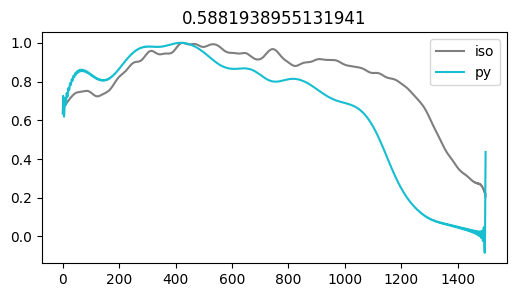

Resample both signals to a length of 1821 samples.
Discrete time shift of 145.
Resample both signals to a length of 1500 samples.


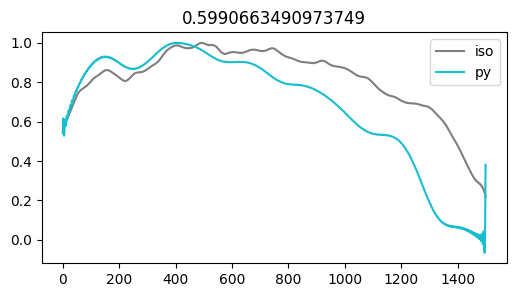

Resample both signals to a length of 1797 samples.
Discrete time shift of 140.
Resample both signals to a length of 1500 samples.


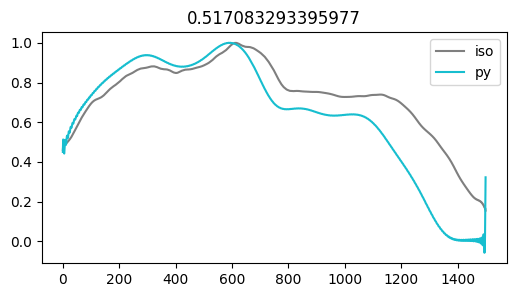

Resample both signals to a length of 1758 samples.
Discrete time shift of 86.
Resample both signals to a length of 1500 samples.


Resample both signals to a length of 1855 samples.
Discrete time shift of 207.
Resample both signals to a length of 1500 samples.


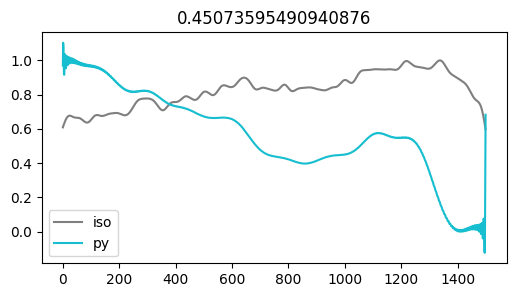

Resample both signals to a length of 1872 samples.
Discrete time shift of 365.
Resample both signals to a length of 1500 samples.


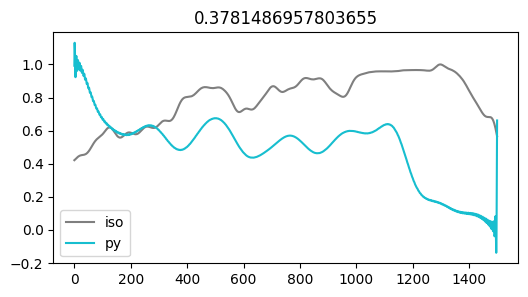

Resample both signals to a length of 1815 samples.
Discrete time shift of 153.
Resample both signals to a length of 1500 samples.


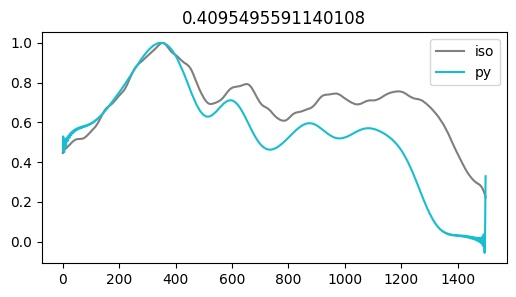

Resample both signals to a length of 1817 samples.
Discrete time shift of 162.
Resample both signals to a length of 1500 samples.


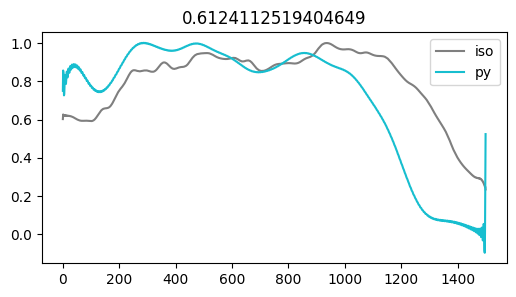

In [44]:
# Get the number of segments in each dictionary
num_iso_segments = len(isoforce_iso.torque_segments)
num_py_segments = len(isoforce_py.torque_segments)

# Remove the first segment from the dictionary with more elements
if num_iso_segments > num_py_segments:
    first_key_iso = next(iter(isoforce_iso.torque_segments))
    del isoforce_iso.torque_segments[first_key_iso]
elif num_py_segments > num_iso_segments:
    first_key_py = next(iter(isoforce_py.torque_segments))
    del isoforce_py.torque_segments[first_key_py]

# Now both dictionaries have equal number of segments
min_segments = min(len(isoforce_iso.torque_segments), len(isoforce_py.torque_segments))

# Process the segments
for idx in range(min_segments):
    # Scale the amplitude range to [0,1]
    iso_seg = scale_to_range(isoforce_iso.torque_segments[f"T_seg_{idx}"])
    py_seg = scale_to_range(isoforce_py.torque_segments[f"T_seg_{idx}"])
    
    # Create two signals of the same length and compute the phase shift
    iso_seg_corr, py_seg_corr = resample_signals(iso_seg, py_seg)
    shift = detect_shift(iso_seg_corr, py_seg_corr)
    
    # Resample the original, amplitude-scaled signals to a constant length
    iso_seg, py_seg = resample_signals(iso_seg[shift:], py_seg, target_length=1500)

    # Plot results
    plt.figure(figsize=(6, 3))
    plt.title(np.correlate(iso_seg, py_seg)[0] / len(iso_seg))
    plt.plot(iso_seg, "C7", label="iso")
    plt.plot(py_seg, "C9", label="py")
    plt.legend()
    plt.show()


In [45]:
for start, stop in zip(isoforce_py.start_idxs, isoforce_py.stop_idxs):
    print("from", isoforce_py.time[start], "to", isoforce_py.time[stop])
    print("Δt", isoforce_py.time[stop] - isoforce_py.time[start])

from 2025-02-19 16:39:46.090000 to 2025-02-19 16:39:49.380000
Δt 0:00:03.290000
from 2025-02-19 16:40:46.130000 to 2025-02-19 16:40:50.960000
Δt 0:00:04.830000
from 2025-02-19 16:41:50.970000 to 2025-02-19 16:41:55.770000
Δt 0:00:04.800000
from 2025-02-19 16:42:45.070000 to 2025-02-19 16:42:50.030000
Δt 0:00:04.960000
from 2025-02-19 16:43:43.330000 to 2025-02-19 16:43:47.920000
Δt 0:00:04.590000
from 2025-02-19 16:44:47.300000 to 2025-02-19 16:44:51.870000
Δt 0:00:04.570000
from 2025-02-19 16:45:55.150000 to 2025-02-19 16:46:00.150000
Δt 0:00:05
from 2025-02-19 16:46:51.960000 to 2025-02-19 16:46:56.730000
Δt 0:00:04.770000
from 2025-02-19 16:47:51.150000 to 2025-02-19 16:47:55.760000
Δt 0:00:04.610000
from 2025-02-19 16:48:56.850000 to 2025-02-19 16:49:01.040000
Δt 0:00:04.190000
from 2025-02-19 16:50:11.110000 to 2025-02-19 16:50:15.930000
Δt 0:00:04.820000
from 2025-02-19 16:51:14.040000 to 2025-02-19 16:51:19.360000
Δt 0:00:05.320000
from 2025-02-19 16:52:17.060000 to 2025-02-19 1

## EIT & Isoforce Analysis

In [17]:
# raw EIT data

import glob

EIT_path = "/Users/arash/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Uni_semester/Master_Thesis/EIT_Thigh_Force_Measurement/Final_Measurements/P06/eit_raw/20250219 16.39.42/processed"
EIT_files = glob.glob(f"{EIT_path}/setup_*.npz")  # Ensures correct file pattern

print(len(EIT_files))  # Check if files are found


33558


In [27]:
eit = list()
eit_timestmps = list()

for ele in np.sort(EIT_files):
    tmp = np.load(ele, allow_pickle=True)
    eit.append(tmp['eit'])
    eit_timestmps.append(tmp['timestamp'])

eit = np.array(eit)
eit_abs = np.abs(eit)
time_stmp = np.array(eit_timestmps)



### check the timestamps between EIT and isoforce recorded by NI

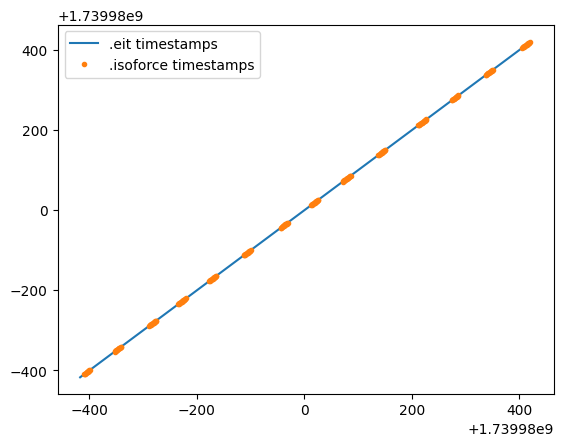

In [23]:
# Raw Isoforce
iso_timestmps = isoforce_py.timestmp_current

plt.plot(eit_timestmps, eit_timestmps,"-", label=".eit timestamps")
plt.plot(iso_timestmps, iso_timestmps, ".", label=".isoforce timestamps")
plt.legend()
plt.show()


### PCA Analysis

In [29]:
from sklearn.decomposition import PCA

data_flattened = eit_abs.reshape(eit_abs.shape[0], -1)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_flattened)

plt.scatter(data_reduced[:, 0],
            data_reduced[:, 1],
            c=scale_to_range(eit_timestmps),
            edgecolors="k",
            alpha=0.7)
plt.xlabel("1. PC", fontsize=12)
plt.ylabel("2. PC", fontsize=12)
plt.show()

# Corresponding EIT values

In [61]:
EIT_segments = list()
isoforce_unix_time = np.array([t.timestamp() for t in isoforce_py.time])

for start, stop in zip(isoforce_py.start_idxs, isoforce_py.stop_idxs):
    start_time = isoforce_unix_time[start]
    stop_time = isoforce_unix_time[stop]
    
    # Find closest indices in EIT time array
    start_idx = np.argmin(np.abs(eit_timestmps - start_time))
    stop_idx = np.argmin(np.abs(eit_timestmps - stop_time))
    EIT_segments.append(eit_abs[start_idx:stop_idx+1, :, :])

    

In [70]:
print(f"EIT segment time shape: {len(eit_segment_time)}")
print(f"EIT mean conductivity shape: {len(mean_conductivity)}")


EIT segment time shape: 330
EIT mean conductivity shape: 133


In [66]:
import seaborn as sns

fig, axes = plt.subplots(len(EIT_segments), 3, figsize=(10, len(EIT_segments) * 3))

for i, segment in enumerate(EIT_segments):
    N = segment.shape[0]
    frames = [0, N//2, N-1]  # Start, Middle, End frames

    for j, frame_idx in enumerate(frames):
        sns.heatmap(segment[frame_idx, :, :], ax=axes[i, j], cmap="viridis", cbar=True)
        axes[i, j].set_title(f"Segment {i+1} - Frame {frame_idx}")

plt.tight_layout()
plt.show()
